In [1]:
# Import necessary libraries.
import pandas as pd

In [2]:
# Read source data "Details of probable/confirmed cases of COVID-19 infection in Hong Kong (English)".
csv_file = './data/enhanced_sur_covid_19_eng_2022_jan.csv'
df1 = pd.read_csv(csv_file)
df1.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
0,1,23/01/2020,21/01/2020,M,39.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56.0,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [3]:
# Data Exploratory and Wrangling.
df1.columns = ['case_no','report_date','date_of_onset','gender','age','name_of_hospital_admitted',
              'hospitalised_discharged_deceased','hk_nonhk_resident','case_classification','confirmed_probable']
df1.head()

,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,1,23/01/2020,21/01/2020,M,39.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56.0,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [4]:
# Check columns data type. report_date column should be using datetime data type for Visualization.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case_no                           12870 non-null  int64  
 1   report_date                       12870 non-null  object 
 2   date_of_onset                     12865 non-null  object 
 3   gender                            12865 non-null  object 
 4   age                               12865 non-null  float64
 5   name_of_hospital_admitted         0 non-null      float64
 6   hospitalised_discharged_deceased  12865 non-null  object 
 7   hk_nonhk_resident                 12865 non-null  object 
 8   case_classification               12865 non-null  object 
 9   confirmed_probable                12870 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1005.6+ KB


In [5]:
# Chanage report_date column to datetime data type.
df1['report_date'] = pd.to_datetime(df1['report_date'], format='%d/%m/%Y')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           12870 non-null  int64         
 1   report_date                       12870 non-null  datetime64[ns]
 2   date_of_onset                     12865 non-null  object        
 3   gender                            12865 non-null  object        
 4   age                               12865 non-null  float64       
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  12865 non-null  object        
 7   hk_nonhk_resident                 12865 non-null  object        
 8   case_classification               12865 non-null  object        
 9   confirmed_probable                12870 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), ob

In [6]:
# Data Exploratory & Wrangling. Check data quality in hk_nonhk_resident column. 
# There is case sensitive issue in this column of data. 
df1.groupby(["hk_nonhk_resident"])["hk_nonhk_resident"].count()

hk_nonhk_resident
HK resident        12255
Non-HK resident      610
Name: hk_nonhk_resident, dtype: int64

In [7]:
# Patch data to address case sensitive issue.
df1['hk_nonhk_resident'] = df1['hk_nonhk_resident'].str.replace('HK resident','HK Resident')
df1['hk_nonhk_resident'] = df1['hk_nonhk_resident'].str.replace('Non-HK resident','Non-HK Resident')
df1.groupby(["hk_nonhk_resident"])["hk_nonhk_resident"].count()

hk_nonhk_resident
HK Resident        12255
Non-HK Resident      610
Name: hk_nonhk_resident, dtype: int64

In [8]:
# Data Exploratory and Analysis. Group by report_date & gender to count a number of cases.
df1.groupby(["report_date", "gender"])["report_date"].count()

report_date  gender
2020-01-23   M          2
2020-01-24   F          2
             M          1
2020-01-26   F          1
             M          2
                       ..
2022-01-05   M         13
2022-01-06   F         20
             M         13
2022-01-07   F         24
             M          9
Name: report_date, Length: 1179, dtype: int64

Text(0, 0.5, 'Number of Cases')

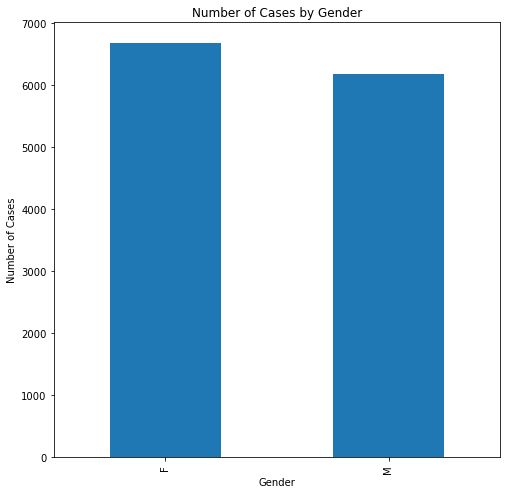

In [9]:
# Data Exploratory and Visualization. Group by gender and count number of cases and then present in a bar chart.
pandaplot = df1.groupby(['gender']).size().plot.bar(figsize=(8,8))
pandaplot.set_title("Number of Cases by Gender")
pandaplot.set_xlabel("Gender")
pandaplot.set_ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

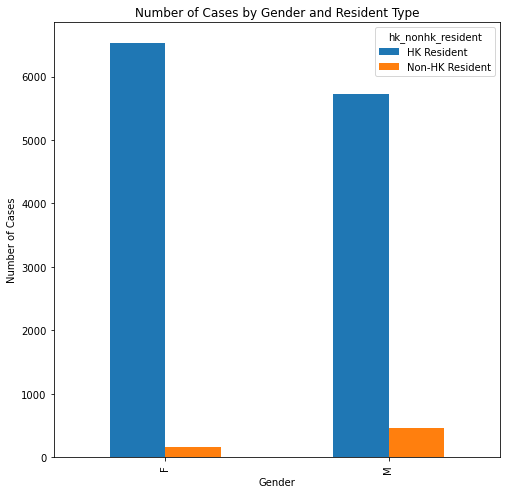

In [10]:
# Data Exploratory and Visualization. Group by gender & hk_nonhk_resident and count number of cases 
# and then present in a bar chart.
pandaplot = pd.crosstab(df1['gender'],df1['hk_nonhk_resident']).plot.bar(figsize=(8,8))
pandaplot.set_title("Number of Cases by Gender and Resident Type")
pandaplot.set_xlabel("Gender")
pandaplot.set_ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

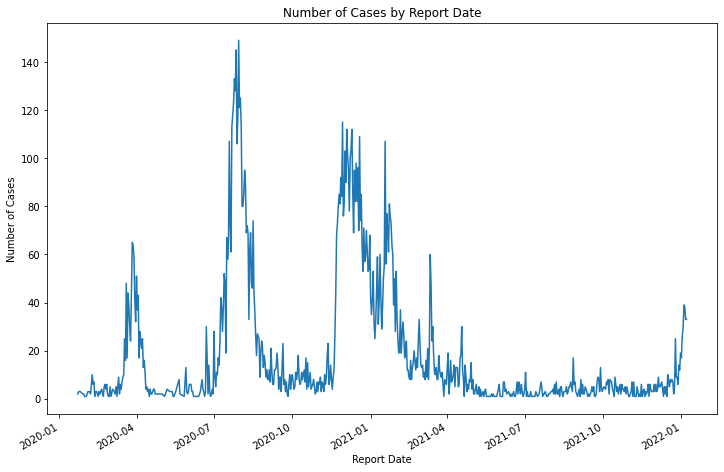

In [11]:
# Data Exploratory and Visualization. Group by report_data & cases count and then present in time series
# line chart.
pandaplot = df1.groupby(['report_date']).size().plot.line(figsize=(12,8))
pandaplot.set_title("Number of Cases by Report Date")
pandaplot.set_xlabel("Report Date")
pandaplot.set_ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

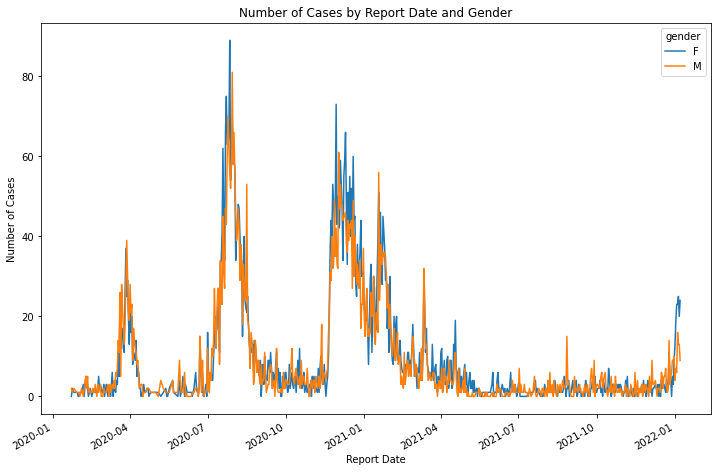

In [12]:
# Data Exploratory and Visualization. Group by report_data & gender & cases count and then present in 
# time series line chart.
pandaplot = pd.crosstab(df1['report_date'],df1['gender']).plot.line(figsize=(12,8))
pandaplot.set_title("Number of Cases by Report Date and Gender")
pandaplot.set_xlabel("Report Date")
pandaplot.set_ylabel("Number of Cases")


In [13]:
# Data Exploratory & Wrangling. Explore the column case_classification.
df1.groupby(["case_classification"])["case_classification"].count()

case_classification
Epidemiologically linked with imported case            84
Epidemiologically linked with local case             6021
Epidemiologically linked with possibly local case      62
Imported case                                        3436
Local case                                           3158
Possibly import-related case                            1
Possibly local case                                   103
Name: case_classification, dtype: int64

Text(0, 0.5, 'Number of Cases')

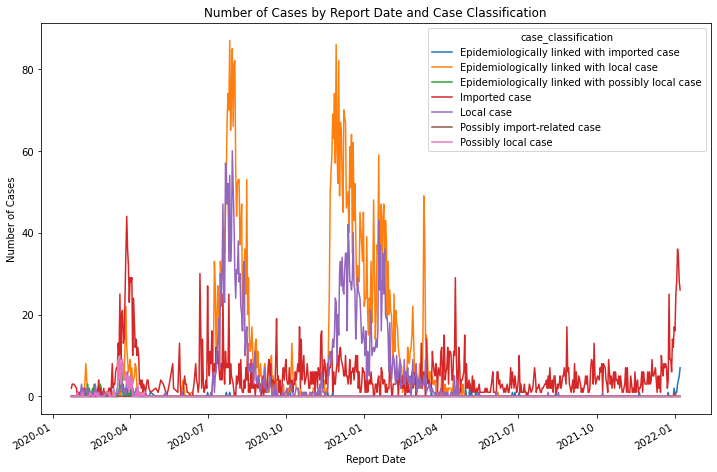

In [14]:
# Data Exploratory and Visualization. Group by report_data & case_classification & cases count and then 
# present in time series line chart.
pandaplot = pd.crosstab(df1['report_date'],df1['case_classification']).plot.line(figsize=(12,8))
pandaplot.set_title("Number of Cases by Report Date and Case Classification")
pandaplot.set_xlabel("Report Date")
pandaplot.set_ylabel("Number of Cases")

In [18]:
# Read source data "Latest situation of reported cases of COVID-19 in Hong Kong (English)".
csv_file = './data/latest_situation_of_reported_cases_covid_19_eng_2022_jan.csv'
df2 = pd.read_csv(csv_file)
df2.head()

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition
0,8/1/2020,12:00,0.0,21.0,17.0,38.0,0,0,0.0,NaN
1,9/1/2020,12:00,0.0,25.0,23.0,48.0,0,0,0.0,NaN
2,10/1/2020,12:00,0.0,31.0,23.0,54.0,0,0,0.0,NaN
3,11/1/2020,12:00,0.0,46.0,15.0,61.0,0,0,0.0,NaN
4,12/1/2020,12:00,0.0,51.0,16.0,67.0,0,0,0.0,NaN


In [19]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# Data Exploratory and Wrangling.
df2.columns = ['as_of_date','as_of_time','num_of_confirmed_cases','num_of_ruled_out_cases',
               'num_of_cases_still_hospitalised_for_investigation',
               'num_of_cases_fullfulling_the_reporting_criteria','num_of_death_cases','num_of_discharge_cases',
               'num_of_probable_cases','num_of_hospitalised_cases_in_critical_condition']
df2.head()

,as_of_date,as_of_time,num_of_confirmed_cases,num_of_ruled_out_cases,num_of_cases_still_hospitalised_for_investigation,num_of_cases_fullfulling_the_reporting_criteria,num_of_death_cases,num_of_discharge_cases,num_of_probable_cases,num_of_hospitalised_cases_in_critical_condition
0,8/1/2020,12:00,0.0,21.0,17.0,38.0,0,0,0.0,NaN
1,9/1/2020,12:00,0.0,25.0,23.0,48.0,0,0,0.0,NaN
2,10/1/2020,12:00,0.0,31.0,23.0,54.0,0,0,0.0,NaN
3,11/1/2020,12:00,0.0,46.0,15.0,61.0,0,0,0.0,NaN
4,12/1/2020,12:00,0.0,51.0,16.0,67.0,0,0,0.0,NaN


In [21]:
# Checking columns data type. report_date column should using datetime data type for Visualization.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   as_of_date                                         731 non-null    object 
 1   as_of_time                                         194 non-null    object 
 2   num_of_confirmed_cases                             724 non-null    float64
 3   num_of_ruled_out_cases                             89 non-null     float64
 4   num_of_cases_still_hospitalised_for_investigation  89 non-null     float64
 5   num_of_cases_fullfulling_the_reporting_criteria    89 non-null     float64
 6   num_of_death_cases                                 731 non-null    int64  
 7   num_of_discharge_cases                             731 non-null    int64  
 8   num_of_probable_cases                              724 non-null    float64
 9   num_of_hos

In [22]:
# Chanage report_date column to datetime data type.
df2['as_of_date'] = pd.to_datetime(df2['as_of_date'], format='%d/%m/%Y')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   as_of_date                                         731 non-null    datetime64[ns]
 1   as_of_time                                         194 non-null    object        
 2   num_of_confirmed_cases                             724 non-null    float64       
 3   num_of_ruled_out_cases                             89 non-null     float64       
 4   num_of_cases_still_hospitalised_for_investigation  89 non-null     float64       
 5   num_of_cases_fullfulling_the_reporting_criteria    89 non-null     float64       
 6   num_of_death_cases                                 731 non-null    int64         
 7   num_of_discharge_cases                             731 non-null    int64         
 8   num_of_probable_case

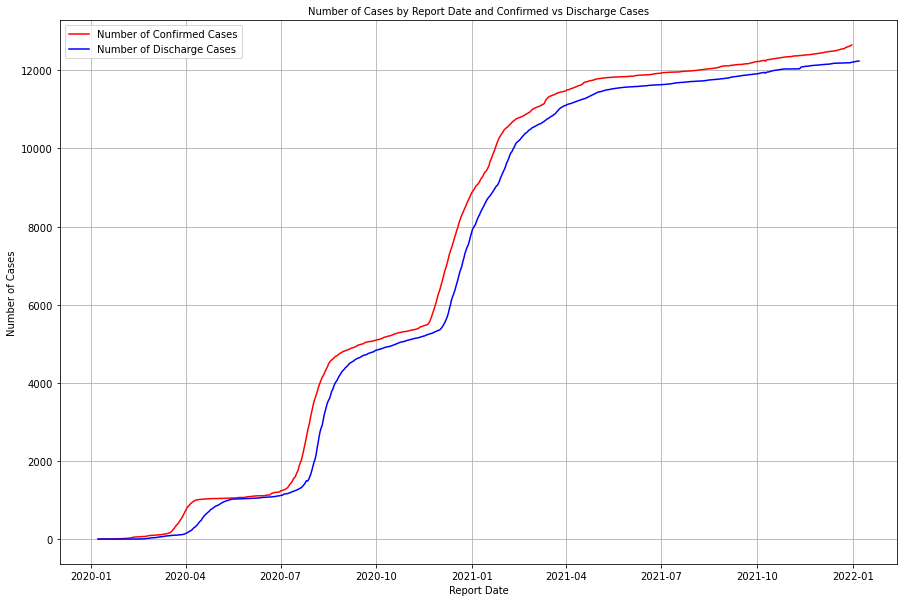

In [23]:
# Data Exploratory and Visualization. Group of num_of_confirmed_cases & num_of_discharge_cases & cases count 
# and then present in time series line chart.
plt.figure(figsize=(15,10))
plt.plot(df2.as_of_date, df2.num_of_confirmed_cases, color='red')
plt.plot(df2.as_of_date, df2.num_of_discharge_cases, color='blue')
plt.title('Number of Cases by Report Date and Confirmed vs Discharge Cases', fontsize=10)
plt.legend(['Number of Confirmed Cases', 'Number of Discharge Cases'], loc='upper left')
plt.xlabel('Report Date', fontsize=10)
plt.ylabel('Number of Cases', fontsize=10)
plt.grid(True)
plt.show()

In [24]:
# Import necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Read source data "Details of probable/confirmed cases of COVID-19 infection in Hong Kong (English)".
csv_file = './data/enhanced_sur_covid_19_eng_2022_jan.csv'
df3 = pd.read_csv(csv_file)
df3.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
0,1,23/01/2020,21/01/2020,M,39.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56.0,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [26]:
# Data Exploratory and Wrangling
df3.columns = ['case_no','report_date','date_of_onset','gender','age','name_of_hospital_admitted',
              'hospitalised_discharged_deceased','hk_nonhk_resident','case_classification','confirmed_probable']
df3.head()

,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,1,23/01/2020,21/01/2020,M,39.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56.0,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [27]:
# Chanage report_date column to datetime data type
df3['report_date'] = pd.to_datetime(df3['report_date'], format='%d/%m/%Y')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           12870 non-null  int64         
 1   report_date                       12870 non-null  datetime64[ns]
 2   date_of_onset                     12865 non-null  object        
 3   gender                            12865 non-null  object        
 4   age                               12865 non-null  float64       
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  12865 non-null  object        
 7   hk_nonhk_resident                 12865 non-null  object        
 8   case_classification               12865 non-null  object        
 9   confirmed_probable                12870 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), ob

In [28]:
# Duplicate report_date column to report_date_delta which is count down from day 0 to latest as we are 
# required to feed numeric value (float) to seaborn.
df3['report_date_delta'] = (df3['report_date'] - df3['report_date'].min())  / np.timedelta64(1,'D')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           12870 non-null  int64         
 1   report_date                       12870 non-null  datetime64[ns]
 2   date_of_onset                     12865 non-null  object        
 3   gender                            12865 non-null  object        
 4   age                               12865 non-null  float64       
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  12865 non-null  object        
 7   hk_nonhk_resident                 12865 non-null  object        
 8   case_classification               12865 non-null  object        
 9   confirmed_probable                12870 non-null  object        
 10  report_date_delta                 12870 non-nu

In [29]:
# Quick look into numeric value of report_date_delta. More or less, you can call it factorization.
df3.groupby(["report_date_delta"])["report_date_delta"].count()

report_date_delta
0.0       2
1.0       3
3.0       3
6.0       2
7.0       2
         ..
711.0    29
712.0    39
713.0    38
714.0    33
715.0    33
Name: report_date_delta, Length: 658, dtype: int64

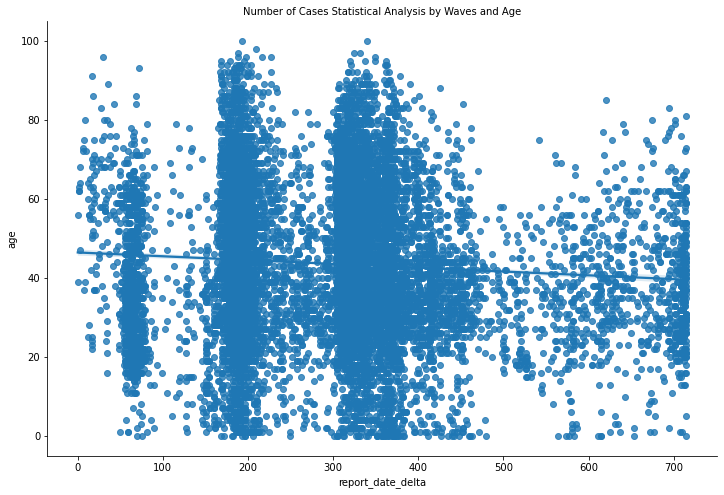

In [30]:
# Data Exploratory & Visualization. Plotting report_date_delta & age columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Number of Cases Statistical Analysis by Waves and Age', fontsize=10)
sns.regplot(x='report_date_delta', y= 'age', data=df3)
sns.despine()

**Data Analysis from Visualization (Latest, Jan 2022)**
* An obvious cluster of cases is being formed recently (Jan 2022), which should be a new wave of COVID-19 variation (Omicron).
* The pattern of wave (Omicron) recently (Jan 2022) is similar to wave 1 in 2 years ago.
* Seem has a pattern of around 100 days between waves 1 to 4. But it is not applicable between wave 4 to currently wave.
* From wave 2 to 3, although the cases are trending down from the end of ware 2. But, as long as still have low numbers of cases, it would make a big impact in the next wave.
* From wave 3 to 4, similar to wave 2 to 3, cases are trending down, with lower numbers of cases, but it is still much more than the previous wave gap. From wave 2 to 3 gap experience, it would make a bigger impact in next wave 4.
* You can figure out the infected people's age is from around 40 and see the trending down.
* Hope the new wave (Omicron) is not repeating the previous waves (COVID-19) back to 2 years ago. God bless our Hong Kong, keep hygiene, stay safe.

**Data Analysis from Visualization (May 2021)**
* There are 4 waves of COVID-19 in Hong Kong.
* Wave 3 is obviously more serious than wave 2, and wave 3 is more or less similar to currently wave 4.
* Seem has a pattern of around 100 days for each of the waves.
* From wave 2 to 3, although the cases are trending down from the end of ware 2. But, as long as still have low numbers of cases, it would make a big impact in the next wave.
* From wave 3 to 4, similar to wave 2 to 3, cases are trending down, with lower numbers of cases, but it is still much more than the previous wave gap. From wave 1 to 2 gap experience, it would make bigger result/impact in next wave (currently), hopefully not, god bless Hong Kong.
* You can figure out the infected people's age is from around 40 and see the trending down.